In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
    )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8779 - loss: 0.4485 - val_accuracy: 0.9801 - val_loss: 0.0614
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9801 - loss: 0.0628 - val_accuracy: 0.9871 - val_loss: 0.0419
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9895 - val_loss: 0.0341
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9881 - val_loss: 0.0375
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9903 - val_loss: 0.0289
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9881 - val_loss: 0.0348
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accu

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0418
Test Loss: 0.03187892958521843
Test accuracy: 0.9902999997138977


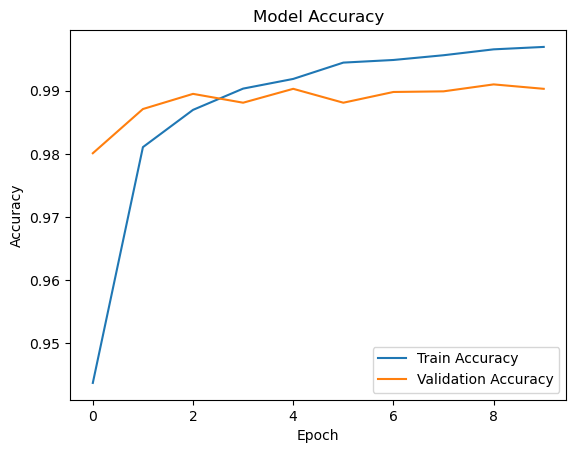

In [15]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Model Accuracy")
plt.show()

In [16]:
model.save("mnist_model.h5")
print(f"Successfully save as mnist_model.h5")

Successfully save as mnist_model.h5
